
# Openscapes Cohort 2023 - Geoweaver FAIRable and Tangible Workflow Demo

PyGeoweaver package is a Python wrapper of the `GeoWeaver`. This package is designed for Jupyter users to be able to directly use Geoweaver in Jupyter notebook or JupyterLab (JupyterHub).
# Installing PyGeoweaver
You can either install pygeoweaver using `pip` or build from `source`


In [5]:
!pip install pygeoweaver --force-reinstall

  Using cached pygeoweaver-0.6.19-py3-none-any.whl (21 kB)
  Attempting uninstall: pygeoweaver
    Found existing installation: pygeoweaver 0.6.19
    Uninstalling pygeoweaver-0.6.19:
      Successfully uninstalled pygeoweaver-0.6.19


The `gw.start()` function starts the Geoweaver Application on background to serve requests

In [7]:
import pygeoweaver as gw
gw.start()

Stop running Geoweaver if any..
Check Java..
Start Geoweaver..
Success: Geoweaver is up


## Reset Passwords (optional if you already did)

This password will be used to authenticate the process runs on localhost (or host with id 100001).

In [11]:
gw.reset_password()

Enter password:  ········
Re-enter password:  ········


NOTE: Password updated.


# Import & Run Workflow : Earthdata Cloud Clinic

This tutorial from Cloud cookbook uses two different direct cloud access & subsetting options available in the Earthdata Cloud. 
* The `earthaccess` python library for data search and direct cloud access, followed by `xarray` subsetting
* The `Harmony-py` python library for direct cloud access & data subsetting

#### The workflow for earthdata cloud clinic for geoweaver is hosted at `https://github.com/earth-artificial-intelligence/earth_data_cloud_clinic_geoweaver`



In [12]:
import os
import urllib.request

home_dir = os.path.expanduser('~')
file_url = "https://github.com/earth-artificial-intelligence/earth_data_cloud_clinic_geoweaver/archive/refs/tags/v0.0.3.zip"
file_path = os.path.join(home_dir, "kr2novmm4i9i27z5adyj.zip")

urllib.request.urlretrieve(file_url, file_path)

gw.import_workflow(file_path)

Unzipping /Users/joe/gw-workspace/temp/kr2novmm4i9i27z5adyj.zip to /Users/joe/gw-workspace/temp/kr2novmm4i9i27z5adyj/
/Users/joe/gw-workspace/temp/kr2novmm4i9i27z5adyj - earth_data_cloud_clinic_geoweaver-0.0.3/
/Users/joe/gw-workspace/temp/kr2novmm4i9i27z5adyj - earth_data_cloud_clinic_geoweaver-0.0.3/.DS_Store
/Users/joe/gw-workspace/temp/kr2novmm4i9i27z5adyj - earth_data_cloud_clinic_geoweaver-0.0.3/README.md
/Users/joe/gw-workspace/temp/kr2novmm4i9i27z5adyj - earth_data_cloud_clinic_geoweaver-0.0.3/code/
/Users/joe/gw-workspace/temp/kr2novmm4i9i27z5adyj - earth_data_cloud_clinic_geoweaver-0.0.3/code/earth_access_authenticate.py
/Users/joe/gw-workspace/temp/kr2novmm4i9i27z5adyj - earth_data_cloud_clinic_geoweaver-0.0.3/code/earth_data_utils.py
/Users/joe/gw-workspace/temp/kr2novmm4i9i27z5adyj - earth_data_cloud_clinic_geoweaver-0.0.3/code/install_packages.sh
/Users/joe/gw-workspace/temp/kr2novmm4i9i27z5adyj - earth_data_cloud_clinic_geoweaver-0.0.3/code/process.json
/Users/joe/gw-wor

### Run workflow

The follow line will execute the workflow on the provided host. `10001` means localhost. You can use `gw.detail_host("100001")` to check the details.

It will prompt a password input field to ask for password of the target host. If you don't know your default password of localhost, please run `gw.reset_password()`. 

In [23]:
gw.run_workflow(workflow_id='kr2novmm4i9i27z5adyj', host_list='100001')

Enter password for host - 100001:  ········


Running workflow kr2novmm4i9i27z5adyj
The workflow has been kicked off.
History Id: 197a10n0xbrc4rqwve
Waiting for it to finish
> Start to run process: ru79i2
> Fnished process: ru79i2 - history: rukmbnsnvhf - Status: Done
> Start to run process: wttkvt
> Fnished process: wttkvt - history: frduhuq69xx - Status: Done
> Start to run process: yvo1ds
> Fnished process: yvo1ds - history: 0y2qx1xwdoo - Status: Done
> Start to run process: cgvhiy
> Fnished process: cgvhiy - history: 406tf32yxb4 - Status: Done
> Start to run process: 1b4ko0
> Fnished process: 1b4ko0 - history: lwk3duy2st6 - Status: Done
Total time cost: 61 seconds
Execution is over. Final status: Failed.


### Using Xarray's built-in plotting function, this simple 2d plot shows the sea surface temperature

In [24]:
from IPython.display import Image

display(Image(filename=os.path.join(home_dir, 'plot2.png')))

FileNotFoundError: [Errno 2] No such file or directory: '/Users/joe/plot2.png'

## Edit the process to change date range

In [18]:
# list processes of the workflow 
gw.list_processes_in_workflow(workflow_id='kr2novmm4i9i27z5adyj')

,title,id
0,earth_data_utils,wttkvt-GJjq8
1,search_data,yvo1ds-96vns
2,earth_access_authenticate,cgvhiy-BgnXM
3,s3_file_storage,1b4ko0-4k9iL


In [3]:
# get code from file earth_access_authenticate
gw.get_code_for_process('cgvhiy')

from earth_data_utils import *

ssh_short_name = "SEA_SURFACE_HEIGHT_ALT_GRIDS_L4_2SATS_5DAY_6THDEG_V_JPL2205"

sst_short_name="MUR-JPL-L4-GLOB-v4.1"

results = earthaccess.search_data(
    short_name=ssh_short_name,
    cloud_hosted=True,
    temporal=("2021-07-01", "2021-09-30"),
)

auth = earthaccess.login(strategy="netrc", persist=True)
ds = xr.open_mfdataset(earthaccess.open(results))
geojson_path = '/home/jovyan/gulf.json'
gdf = gpd.read_file(geojson_path) #Return a GeoDataFrame object


harmony_client = Client()
sst_short_name="MUR-JPL-L4-GLOB-v4.1"

request = Request(
  collection=Collection(id=sst_short_name),
  shape=geojson_path,
  temporal={
    'start': dt.datetime(2021, 8, 1, 1),
    'stop': dt.datetime(2021, 8, 1, 2)   
  },
)
job_id = harmony_client.submit(request)
harmony_client.wait_for_processing(job_id, show_progress=False)
data = harmony_client.result_json(job_id)
results = harmony_client.result_urls(job_id, link_type=LinkType.s3)
urls = list(results)
url = urls[0]

In [3]:
# write the file to disk to make changes
gw.sync(process_id='cgvhiy', sync_to_path=home_dir, direction="download")

Proceeding with download

Wrote file earth_access_authenticate.py to /home/jovyan/


In [7]:
# sync changes back to the workflow after editing the file
gw.sync(process_id='cgvhiy', sync_to_path=os.path.join(home_dir, 'earth_access_authenticate.py'), direction="upload")

Proceeding with upload



In [10]:
# verify code change
gw.get_code_for_process('cgvhiy')

from earth_data_utils import *

ssh_short_name = "SEA_SURFACE_HEIGHT_ALT_GRIDS_L4_2SATS_5DAY_6THDEG_V_JPL2205"

sst_short_name="MUR-JPL-L4-GLOB-v4.1"

results = earthaccess.search_data(
    short_name=ssh_short_name,
    cloud_hosted=True,
    temporal=("2020-07-01", "2020-09-30"),
)

auth = earthaccess.login(strategy="netrc", persist=True)
ds = xr.open_mfdataset(earthaccess.open(results))
geojson_path = '/home/jovyan/gulf.json'
gdf = gpd.read_file(geojson_path) #Return a GeoDataFrame object


harmony_client = Client()
sst_short_name="MUR-JPL-L4-GLOB-v4.1"

request = Request(
  collection=Collection(id=sst_short_name),
  shape=geojson_path,
  temporal={
    'start': dt.datetime(2020, 8, 1, 1),
    'stop': dt.datetime(2020, 8, 1, 2)   
  },
)
job_id = harmony_client.submit(request)
harmony_client.wait_for_processing(job_id, show_progress=False)
data = harmony_client.result_json(job_id)
results = harmony_client.result_urls(job_id, link_type=LinkType.s3)
urls = list(results)
url = urls[0]

Enter password for host - 100001:  ········
Running workflow kr2novmm4i9i27z5adyj
The workflow has been kicked off.
History Id: o0enoj5tgqss95igeb
Waiting for it to finish
> Start to run process: wttkvt
> Fnished process: wttkvt - history: r2asbsxdswe - Status: Done
> Start to run process: cgvhiy
> Fnished process: cgvhiy - history: ymwjaacrz2k - Status: Done
> Start to run process: 1b4ko0
> Fnished process: 1b4ko0 - history: ytpw40tli2u - Status: Done
Total time cost: 123 seconds
Execution is over. Final status: Done.


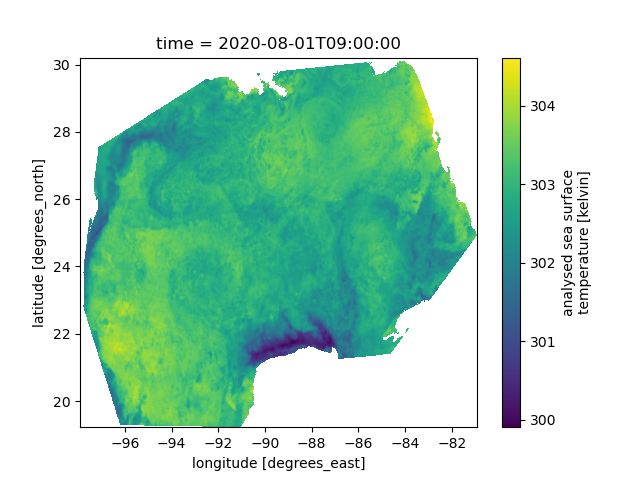

In [8]:
gw.run_workflow(workflow_id='kr2novmm4i9i27z5adyj', host_list='100001')
from IPython.display import Image
display(Image(filename=os.path.join(home_dir, 'plot2.png')))

In [3]:
# get run history of the process
gw.get_process_history('cgvhiy')

,history_id,history_input,history_output,history_begin_time,history_end_time,history_notes,history_process,host_id,indicator
0,ymwjaacrz2k,from earth_data_utils import *\n\nssh_short_na...,/srv/conda/envs/notebook/lib/python3.9/site-pa...,2023-06-13 19:30:25.895000064,2023-06-13 19:31:36.843000064,None,cgvhiy,100001,Done
1,tegg9j1qpu2,from earth_data_utils import *\n\nssh_short_na...,/srv/conda/envs/notebook/lib/python3.9/site-pa...,2023-06-13 19:26:03.112999936,2023-06-13 19:27:34.072999936,None,cgvhiy,100001,Done
2,lul2sozz4x1,from earth_data_utils import *\n\nssh_short_na...,/srv/conda/envs/notebook/lib/python3.9/site-pa...,2023-06-13 18:47:55.624000000,2023-06-13 18:50:31.606000128,None,cgvhiy,100001,Done
3,01t3nw7u2nf,"from search_data import *\n\nsst_short_name=""M...",/srv/conda/envs/notebook/lib/python3.9/site-pa...,2023-06-13 14:11:36.304000000,2023-06-13 14:14:32.532999936,None,cgvhiy,100001,Done
4,0o6dx0px27x,"from search_data import *\n\nsst_short_name=""M...",/srv/conda/envs/notebook/lib/python3.9/site-pa...,2023-06-13 05:13:18.384999936,2023-06-13 05:14:31.713999872,None,cgvhiy,100001,Done
5,1llchcspi3l,No code saved,Skipped,2023-06-13 05:04:32.823000064,2023-06-13 05:04:32.823000064,None,cgvhiy,100001,Skipped
6,qlori0y7gvu,No code saved,Skipped,2023-06-13 05:02:23.824000000,2023-06-13 05:02:57.865999872,None,cgvhiy,100001,Stopped
7,6k5kastvud0,No code saved,Skipped,2023-06-13 04:46:43.556000000,2023-06-13 04:50:42.448999936,None,cgvhiy,100001,Stopped
8,4vcjckvbwqe,"from search_data import *\n\nsst_short_name=""M...",/srv/conda/envs/notebook/lib/python3.9/site-pa...,2023-06-13 04:13:41.710000128,2023-06-13 04:45:56.057999872,None,cgvhiy,100001,Stopped
9,j2rg3ef6rul,None,Authentication Failed. Wrong Password.,2023-06-13 04:12:51.059000064,2023-06-13 04:12:51.096000000,None,cgvhiy,100001,Failed


In [3]:
gw.get_workflow_history('kr2novmm4i9i27z5adyj')

,history_id,history_input,history_output,history_begin_time,history_end_time,history_notes,history_process,host_id,indicator
0,o0enoj5tgqss95igeb,wttkvt-GJjq8;cgvhiy-BgnXM;1b4ko0-4k9iL;,r2asbsxdswe;ymwjaacrz2k;ytpw40tli2u;,2023-06-13 19:30:14.905,2023-06-13 19:31:38.431000064,None,kr2novmm4i9i27z5adyj,100001;,Done
1,otrr4bjr5vvwob8kzf,wttkvt-GJjq8;cgvhiy-BgnXM;1b4ko0-4k9iL;,ton9zjgdjuk;tegg9j1qpu2;sseb6y2m8fy;,2023-06-13 19:25:52.124,2023-06-13 19:27:35.617999872,None,kr2novmm4i9i27z5adyj,100001;,Done
2,xdc6fso7wkybrk71o7,wttkvt-GJjq8;cgvhiy-BgnXM;1b4ko0-4k9iL;,uq7pxxct69k;lul2sozz4x1;qcwhsqh68ll;,2023-06-13 18:47:44.634,2023-06-13 18:50:33.315000064,None,kr2novmm4i9i27z5adyj,100001;,Done
3,unlenty6p8qrl03z42,wttkvt-GJjq8;yvo1ds-96vns;cgvhiy-BgnXM;1b4ko0-...,27ywqplqama;1g4ily9u0x7;01t3nw7u2nf;o23ja6j5i9i;,2023-06-13 14:11:13.562,2023-06-13 14:14:34.502000128,None,kr2novmm4i9i27z5adyj,100001;,Done
4,xsUiKqCumWr86iaEFQ,wttkvt-GJjq8;yvo1ds-96vns;cgvhiy-BgnXM;1b4ko0-...,yvx83lhph1j;h4fh5a8ni2n;0o6dx0px27x;6dlcc5ae923;,2023-06-13 05:12:57.861,2023-06-13 05:14:33.380999936,None,kr2novmm4i9i27z5adyj,100001;,Done
5,5ou0GVSM1NQnlv7FOB,wttkvt-GJjq8;yvo1ds-96vns;cgvhiy-BgnXM;1b4ko0-...,s5e7087vr1q;zqhu0tomq42;1llchcspi3l;joj0lfoon7u;,2023-06-13 05:04:32.814,2023-06-13 05:04:32.897999872,None,kr2novmm4i9i27z5adyj,100001;,Done
6,csltVkAvLqfza0jV0i,wttkvt-GJjq8;yvo1ds-96vns;cgvhiy-BgnXM;1b4ko0-...,41l2aiz7t60;kfzm1gsm2q3;qlori0y7gvu;5gv9vylxfc1;,2023-06-13 05:02:23.814,2023-06-13 05:02:24.524000000,None,kr2novmm4i9i27z5adyj,100001;,Done
7,BacPAagztwKFogMSWa,wttkvt-GJjq8;yvo1ds-96vns;cgvhiy-BgnXM;1b4ko0-...,s7tk2j8ds8o;eyco001wisz;6k5kastvud0;017zyblveve;,2023-06-13 04:46:43.517,2023-06-13 04:46:43.591000064,None,kr2novmm4i9i27z5adyj,100001;,Done
8,u6EibxNEZg5Or4d4gZ,wttkvt-GJjq8;yvo1ds-96vns;cgvhiy-BgnXM;1b4ko0-...,6n080fci3ip;ijf85fbchyu;4vcjckvbwqe;q5lfxjata7f;,2023-06-13 04:13:20.415,2023-06-13 04:20:59.047000064,None,kr2novmm4i9i27z5adyj,100001;,Stopped
9,3ZlO4QZpqjhGyKmyXO,wttkvt-GJjq8;yvo1ds-96vns;cgvhiy-BgnXM;1b4ko0-...,qjzve8oimqm;htpbdvjc8no;j2rg3ef6rul;zpwvlwn3rb8;,2023-06-13 04:12:49.725,2023-06-13 04:12:51.983000064,None,kr2novmm4i9i27z5adyj,100001;,Failed


## A easier way to Upload the file to the workflow and Run it in 1 line

In [3]:
gw.run_process(host_id='100001', process_id='dh8stf', sync_path=os.path.join(home_dir, 'earth_data_utils.py'))

Enter password for host - 100001:  ········
Updating code on workflow with the given file path.

Staring process dh8stf
Execution finished
Total time cost: 7 seconds
+--------------------+--------+---------------------+---------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------+
| History Id         | Status | Begin Time          | End Time            | Input             

# Editing Process & Workflow JSON

In [4]:
gw.export_workflow(workflow_id='kr2novmm4i9i27z5adyj', mode=4, target_file_path=os.path.join(home_dir, 'workflow.zip'), unzip=True, unzip_directory_name="kr2novmm4i9i27z5adyj")

Workflow kr2novmm4i9i27z5adyj has been exported to file: /home/jovyan/workflow.zip


In [3]:
# after editing the workflow / process JSON files
# re-upload to workflow

gw.run_workflow(workflow_id='kr2novmm4i9i27z5adyj', workflow_folder_path=os.path.join(home_dir, 'kr2novmm4i9i27z5adyj'), host_list='100001')

Enter password for host - 100001:  ········
Running Commnad:  /srv/conda/envs/notebook/bin/java -jar /home/jovyan/geoweaver.jar run workflow kr2novmm4i9i27z5adyj -d '/home/jovyan/kr2novmm4i9i27z5adyj' -h 100001
Running workflow kr2novmm4i9i27z5adyj
The folder is zipped into /home/jovyan/gw-workspace/temp/kr2novmm4i9i27z5adyj.zipUnzipping /home/jovyan/gw-workspace/temp/kr2novmm4i9i27z5adyj.zip to /home/jovyan/gw-workspace/temp/kr2novmm4i9i27z5adyj/
/home/jovyan/gw-workspace/temp/kr2novmm4i9i27z5adyj - /
/home/jovyan/gw-workspace/temp/kr2novmm4i9i27z5adyj - history/
/home/jovyan/gw-workspace/temp/kr2novmm4i9i27z5adyj - history/mr9YcFRUnuNyThJb4Q.json
/home/jovyan/gw-workspace/temp/kr2novmm4i9i27z5adyj - history/PNFURuqn5MBZk110Fh.json
/home/jovyan/gw-workspace/temp/kr2novmm4i9i27z5adyj - history/54jcaiqoso3iree437.json
/home/jovyan/gw-workspace/temp/kr2novmm4i9i27z5adyj - history/QBaTZsjXUzZrYyaSGY.json
/home/jovyan/gw-workspace/temp/kr2novmm4i9i27z5adyj - history/y2mnxktf5j68wxy68b.json

# Import & Run Workflow: Direct Access and Harmony workflow

This workflow geos over two different access and transformation options across a single dataset available in the Earthdata Cloud: Direct s3 access and Harmony transformation services. It focuses on Sea Surface Temperature (SST) from the GHRSST MODIS L2 dataset (MODIS_T-JPL-L2P-v2019.0) available from PO.DAAC in the Earthdata Cloud.

In [16]:
!wget -O g9f31x68j54tgzau60pf.zip https://github.com/earth-artificial-intelligence/harmony_workflow_geoweaver/archive/main.zip
gw.import_workflow(os.path.join(home_dir, 'g9f31x68j54tgzau60pf.zip'))

--2023-06-14 07:50:55--  https://github.com/earth-artificial-intelligence/harmony_workflow_geoweaver/archive/main.zip
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/earth-artificial-intelligence/harmony_workflow_geoweaver/zip/refs/heads/main [following]
--2023-06-14 07:50:55--  https://codeload.github.com/earth-artificial-intelligence/harmony_workflow_geoweaver/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 192.30.255.120
Connecting to codeload.github.com (codeload.github.com)|192.30.255.120|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘g9f31x68j54tgzau60pf.zip’

g9f31x68j54tgzau60p     [ <=>                ] 146.42K  --.-KB/s    in 0.04s   

2023-06-14 07:50:56 (3.46 MB/s) - ‘g9f31x68j54tgzau60pf.zip’ saved [149936]

Unzipping

In [25]:
gw.run_workflow(workflow_id='g9f31x68j54tgzau60pf', host_list='100001')

Enter password for host:  ········
Running workflow g9f31x68j54tgzau60pf
The workflow has been kicked off.
History Id: e0nv0hzy7gu3be8jyt
Waiting for it to finish
> Start to run process: iy50ea
> Fnished process: iy50ea - history: e3io0z3k8av - Status: Done
> Start to run process: y2amjw
> Fnished process: y2amjw - history: nj8flle6zwq - Status: Done
> Start to run process: cqp5y5
> Fnished process: cqp5y5 - history: 1jeg3quiplo - Status: Done
> Start to run process: u09gh6
> Fnished process: u09gh6 - history: 3c3usdxkwsj - Status: Done
> Start to run process: dh8stf
> Fnished process: dh8stf - history: hs373bzd4uf - Status: Done
Total time cost: 106 seconds
Execution is over. Final status: Done.


#### The below sea surface temperature plot is generated from `MODIS Terra L2P SST` at time `2021-08-20` via direct access to s3

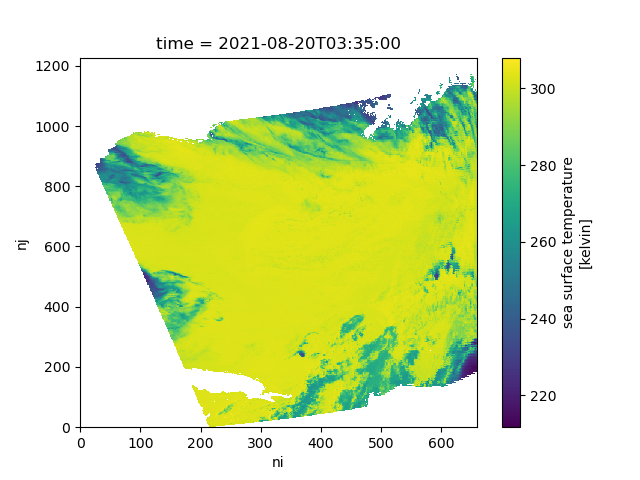

In [26]:
display(Image(filename=os.path.join(home_dir, 'harmony_plot_1.png')))

#### Below plot is generated by using harmony client with temporal values ranging from 2021-08-20 to 2021-08-21

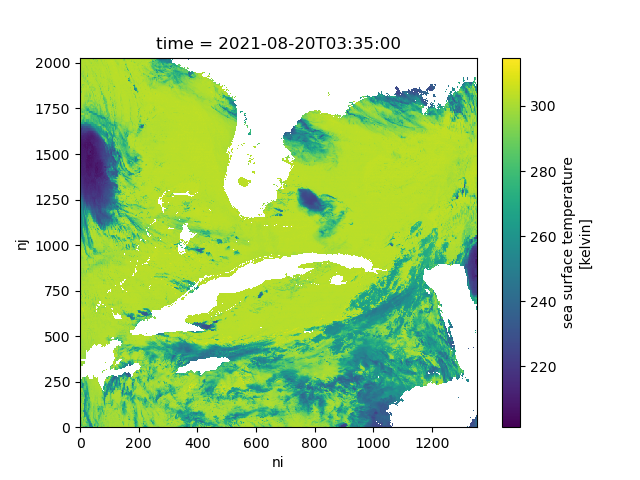

In [11]:
from IPython.display import Image
display(Image(filename='podaac_s3_plot_1.png'))

## Edit process to change date range

In [12]:
gw.list_processes_in_workflow(workflow_id='g9f31x68j54tgzau60pf')

,title,id
0,utils,iy50ea-bjl3n
1,authenticate,y2amjw-Dnytd
2,podaac_s3,cqp5y5-VfulM
3,end,dh8stf-7hTrq
4,harmony_connect_process,u09gh6-UWbai


In [27]:
gw.get_code_for_process('cqp5y5')

import os
import matplotlib.pyplot as plt
from authenticate import *

home_dir = os.path.expanduser("~")
plot_file_name = os.path.join(home_dir, "podaac_s3_plot_1.png")

if os.path.isfile(plot_file_name):
  os.remove(plot_file_name)

urs = 'urs.earthdata.nasa.gov'    # Earthdata URL endpoint for authentication
prompts = ['Enter NASA Earthdata Login Username: ',
           'Enter NASA Earthdata Login Password: ']

# Determine the OS (Windows machines usually use an '_netrc' file)
netrc_name = "_netrc" if system()=="Windows" else ".netrc"

# Determine if netrc file exists, and if so, if it includes NASA Earthdata Login Credentials
try:
    netrcDir = os.path.expanduser(f"~/{netrc_name}")
    netrc(netrcDir).authenticators(urs)[0]

# Below, create a netrc file and prompt user for NASA Earthdata Login Username and Password
except FileNotFoundError:
    homeDir = os.path.expanduser("~")
    Popen('touch {0}{2} | echo machine {1} >> {0}{2}'.format(homeDir + os.sep, urs, netrc_name), shell=Tr

In [28]:
gw.sync(process_id='cqp5y5', sync_to_path=home_dir, direction="download")

Proceeding with download

Wrote file podaac_s3.py to /home/jovyan/


In [21]:
gw.sync(process_id='u09gh6', sync_to_path=os.path.join(home_dir, 'harmony_connect_process.py'), direction="upload")

Proceeding with upload



# Import and Run Workflow: Sea Level Rise

This workflow from Cloud cookbook aims to reproduce the plot from `https://grace.jpl.nasa.gov/news/113/nasa-led-study-reveals-the-causes-of-sea-level-rise-since-1900/`

In [15]:
!wget -O 96tqhttgag3b6wbi1fgb.zip https://github.com/earth-artificial-intelligence/sea_level_rise_geoweaver/archive/main.zip
gw.import_workflow(os.path.join(home_dir, '96tqhttgag3b6wbi1fgb.zip'))

--2023-06-14 07:41:48--  https://github.com/earth-artificial-intelligence/sea_level_rise_geoweaver/archive/main.zip
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/earth-artificial-intelligence/sea_level_rise_geoweaver/zip/refs/heads/main [following]
--2023-06-14 07:41:48--  https://codeload.github.com/earth-artificial-intelligence/sea_level_rise_geoweaver/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 192.30.255.120
Connecting to codeload.github.com (codeload.github.com)|192.30.255.120|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘96tqhttgag3b6wbi1fgb.zip’

96tqhttgag3b6wbi1fg     [ <=>                ] 240.02K  --.-KB/s    in 0.1s    

2023-06-14 07:41:48 (1.86 MB/s) - ‘96tqhttgag3b6wbi1fgb.zip’ saved [245780]

Unzipping /home

In [30]:
gw.run_workflow(workflow_id='96tqhttgag3b6wbi1fgb', host_list='100001')

Enter password for host:  ········
Running workflow 96tqhttgag3b6wbi1fgb
The workflow has been kicked off.
History Id: uftbtmyuz38wgv6wxy
Waiting for it to finish
> Start to run process: bs1l0r
> Fnished process: bs1l0r - history: 2wjp9k1xyc9 - Status: Done
> Start to run process: qeb9yn
> Fnished process: qeb9yn - history: y4o0a35b7rv - Status: Done
> Start to run process: x7coy2
> Fnished process: x7coy2 - history: a5zsio91jo5 - Status: Done
Total time cost: 61 seconds
Execution is over. Final status: Done.


#### Below plot shows the satellite record for observed global-average sea level

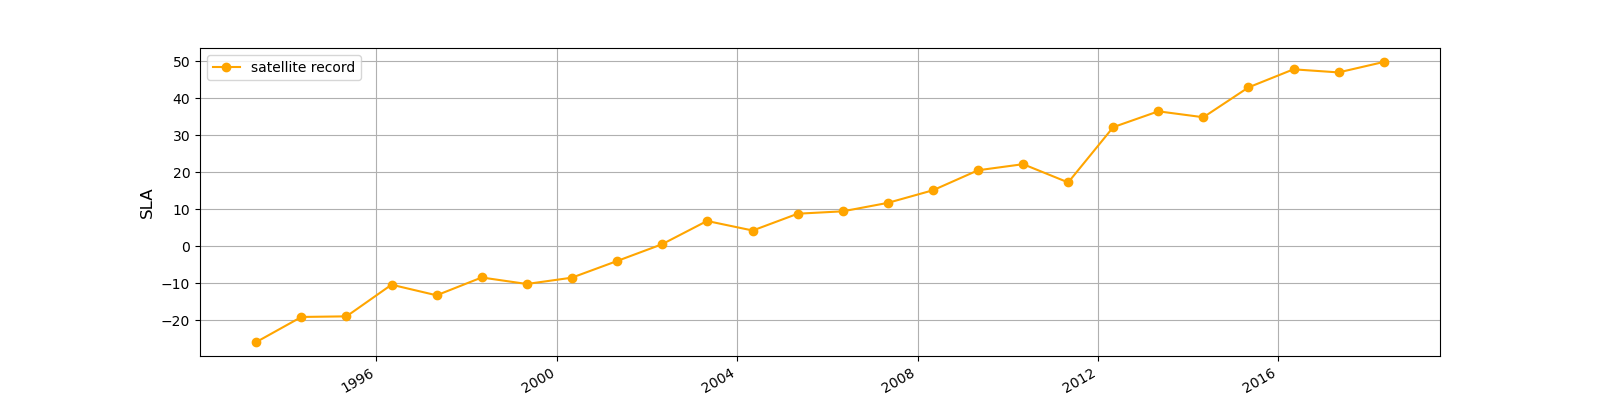

In [31]:
display(Image(filename=os.path.join(home_dir, 'global_sea_level_avg.png')))

#### The plot is created using data from granule_query() for `SEA_SURFACE_HEIGHT_ALT_GRIDS_L4_2SATS_5DAY_6THDEG_V_JPL2205`

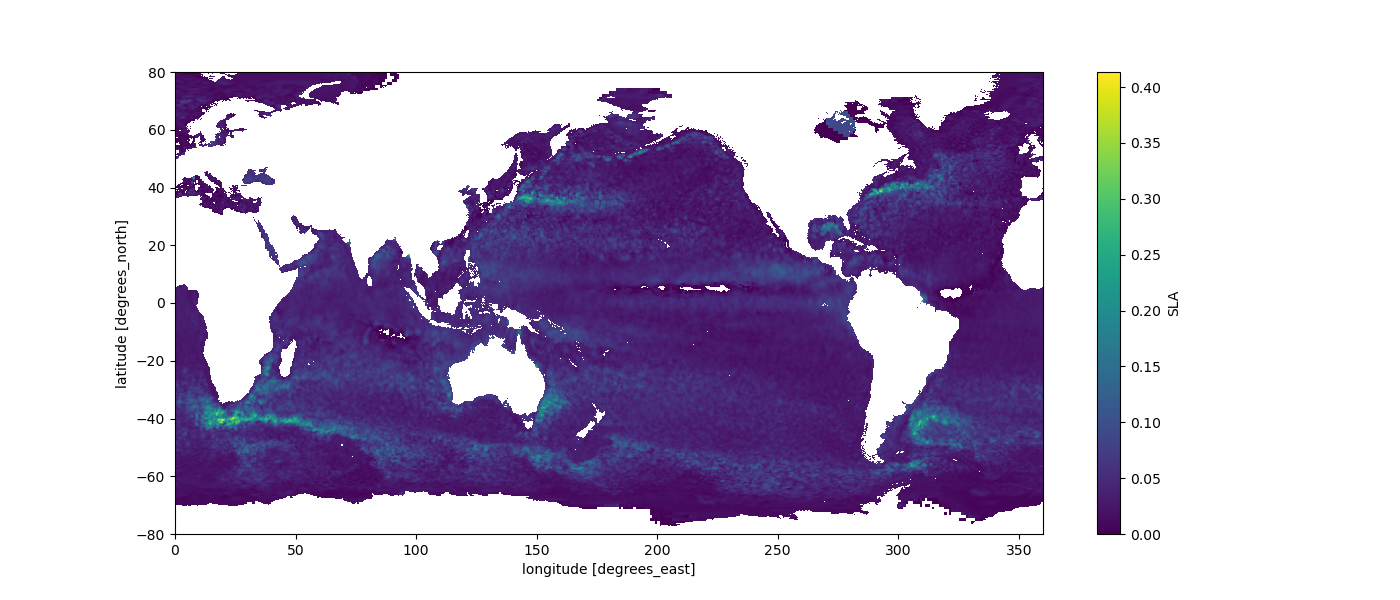

In [32]:
display(Image(filename=os.path.join(home_dir, 'sla_plot.png')))